In [1]:
# Standard import
import os

In [2]:
os.getcwd()

'C:\\Users\\PBANE\\OneDrive - Monsanto\\Migrated from My PC\\Documents\\DataScienceAnalytics\\Python\\PythonProjects\\ML_Kaggle\\House_Price'

In [19]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=12)

In [4]:
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
rawData = pd.read_csv("train.csv")

In [6]:
housingData = rawData.copy()
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

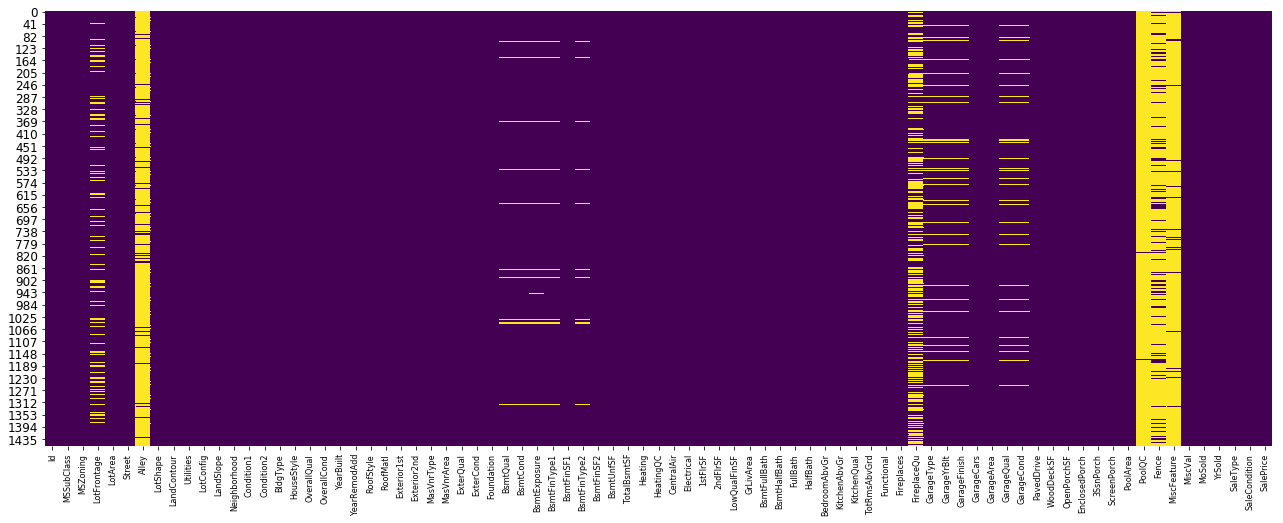

In [26]:
plt.figure(figsize= (22, 8))
sns.heatmap(housingData.isnull(), cmap= 'viridis', cbar= False)

In [153]:
# Subsetting data with numerical & object columns
housingData.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [156]:
housingDataNum = housingData.select_dtypes(include= ['int64', 'float64'])
housingDataCat = housingData.select_dtypes(exclude= ['int64', 'float64'])

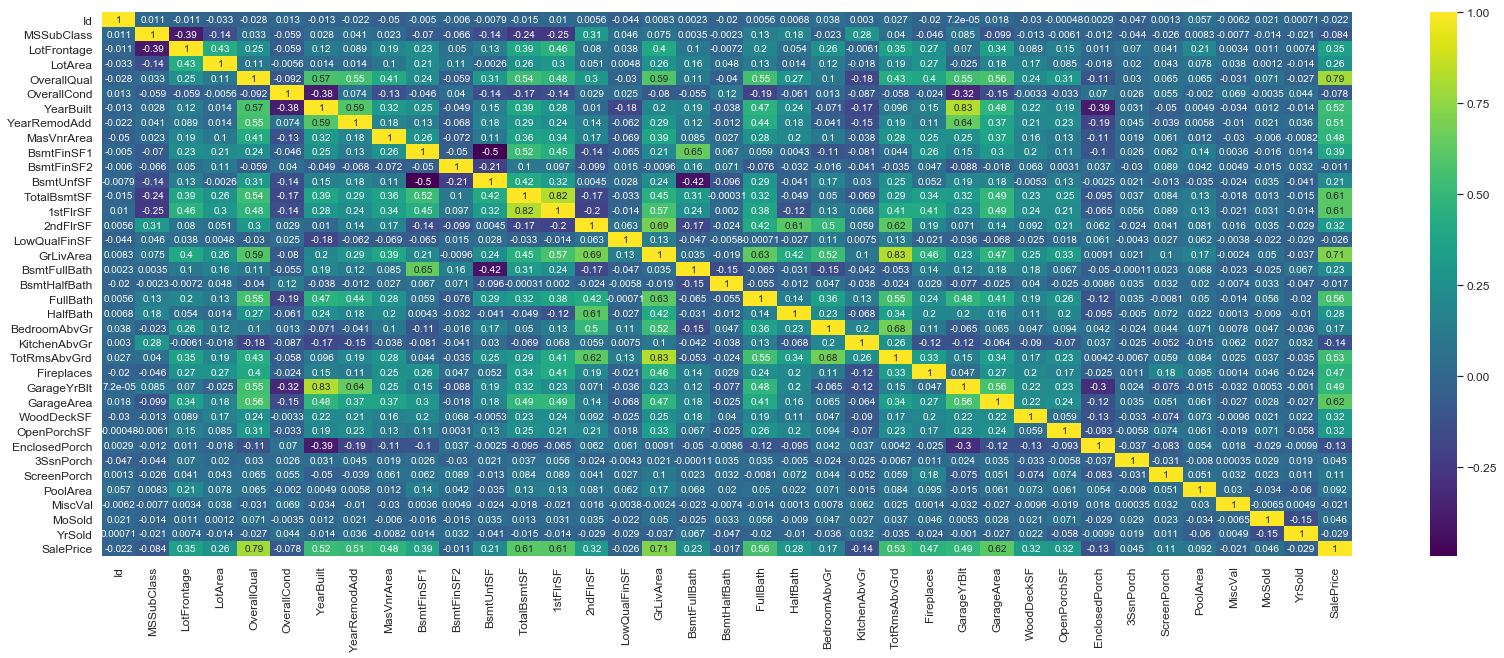

In [157]:
# Correlation assessment
plt.figure(figsize= (28,10))
sns.heatmap(housingDataNum.corr(), cmap = 'viridis', annot= True)

In [145]:
housingData = housingData.drop('GarageCars', axis= 1)

In [158]:
housingDataNum.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

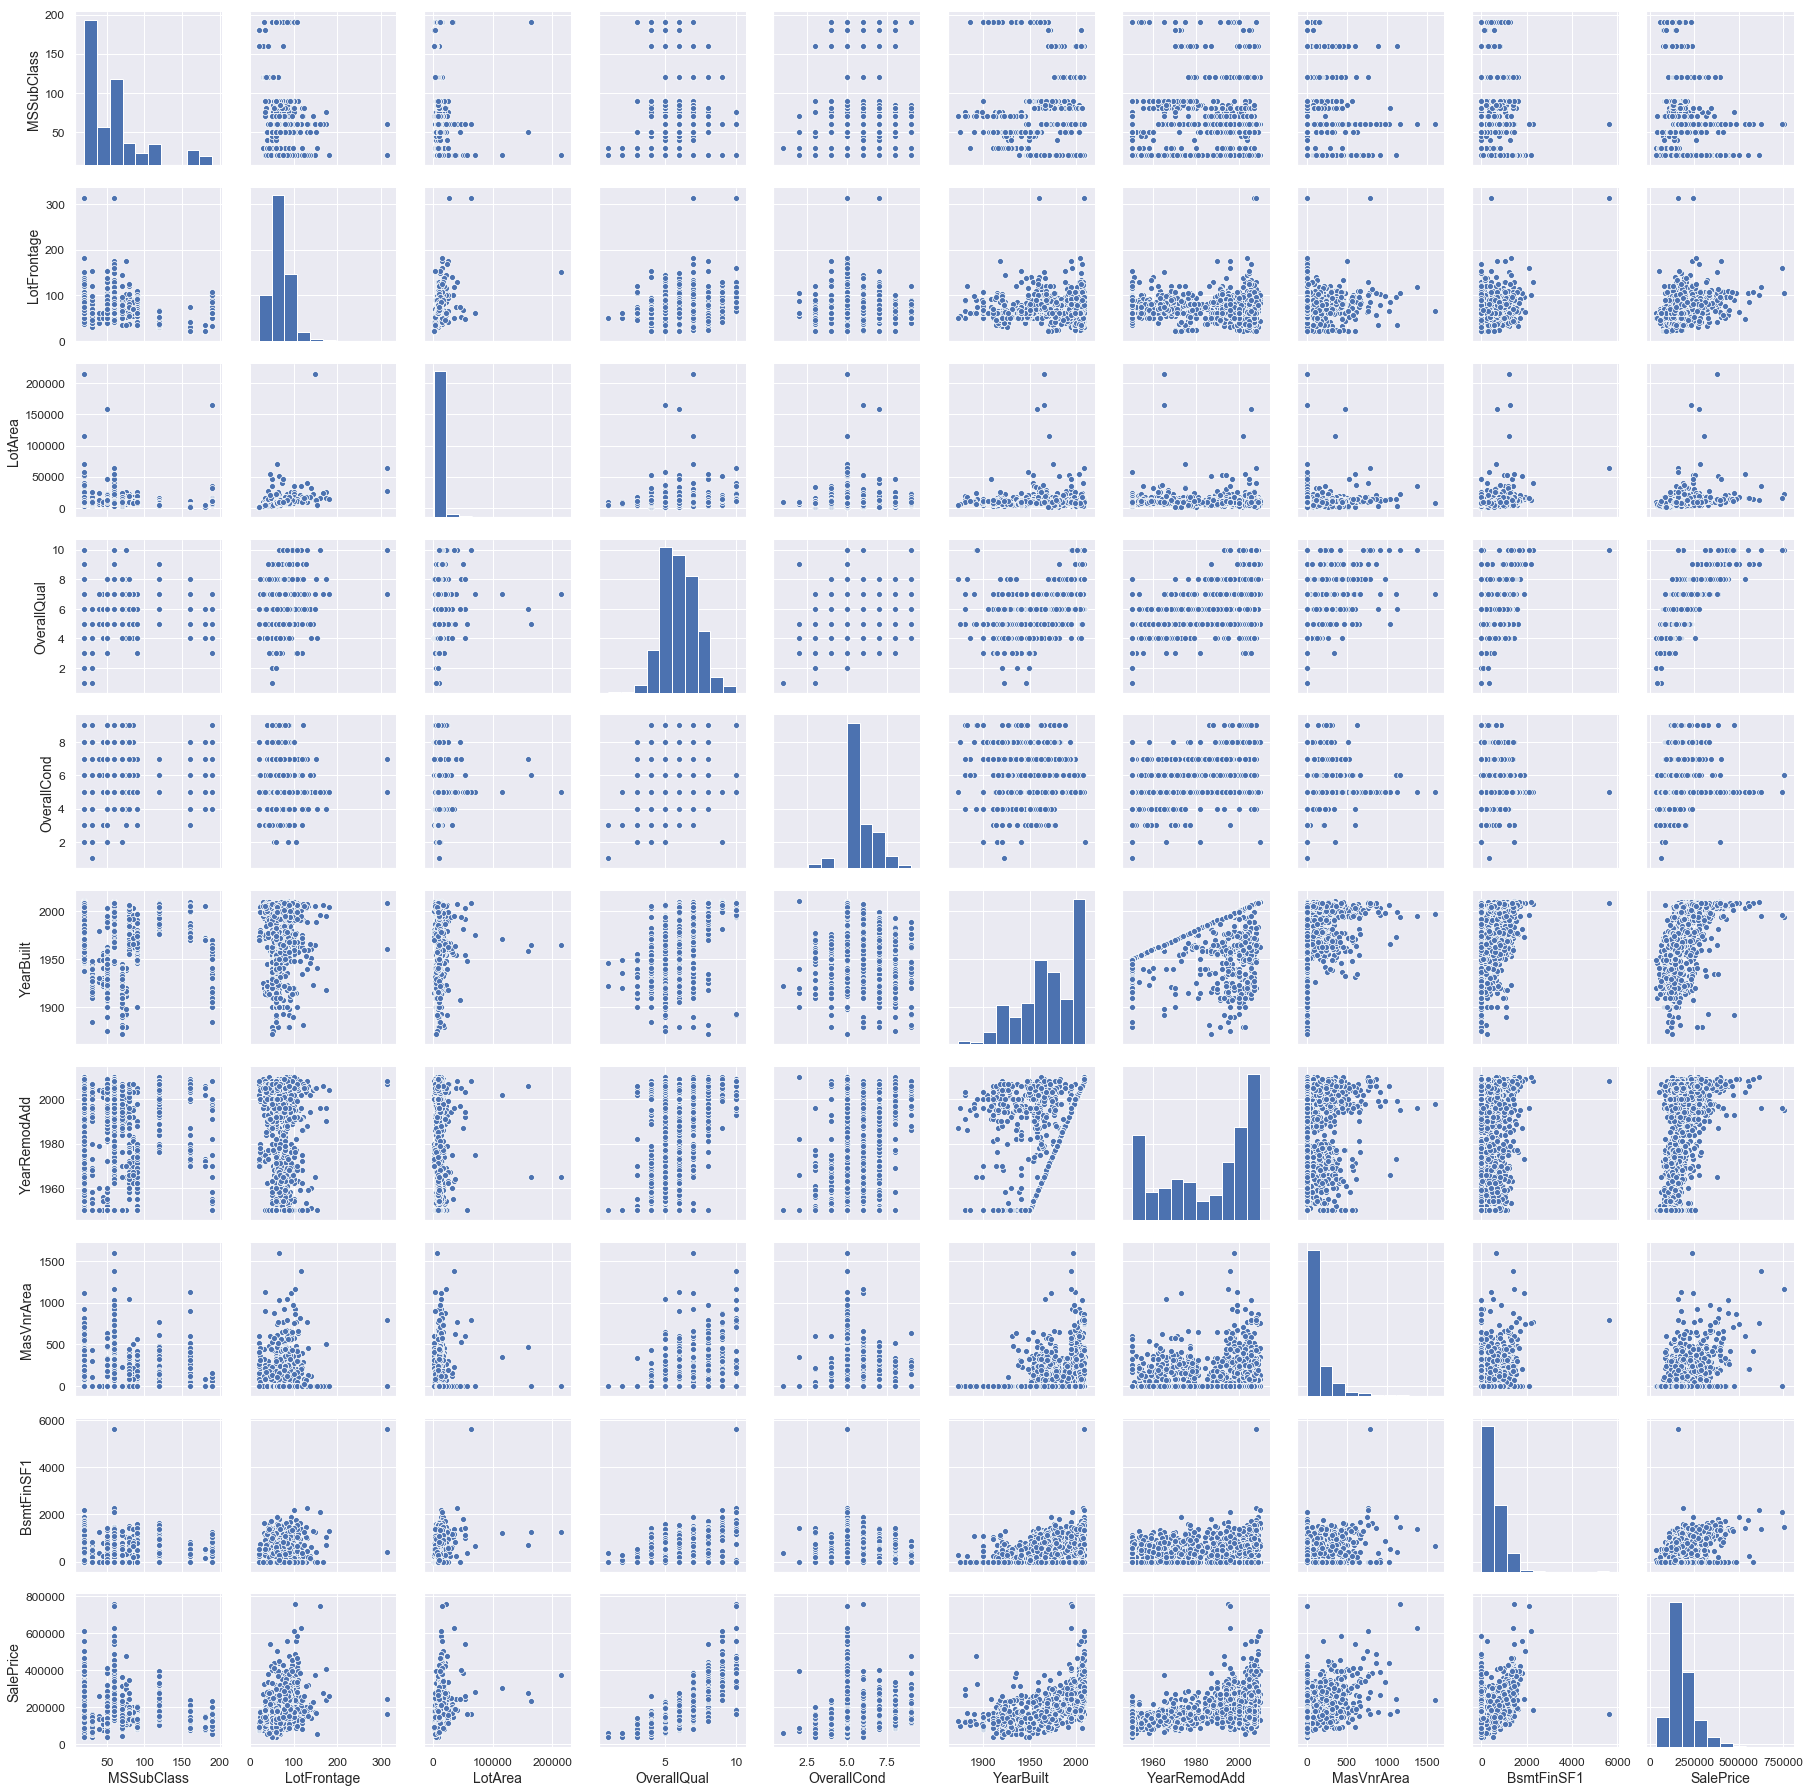

In [161]:
sns.pairplot(housingData.loc[:, ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'SalePrice']])

In [146]:
# Creating a missing value summary table. 
nullSummary = housingData.isnull().sum()/len(housingData)
nullSummary = pd.DataFrame(nullSummary)
nullSummary.columns = ['pctMissing']
nullSummary = nullSummary.loc[nullSummary['pctMissing'] > 0].sort_values(by = 'pctMissing', ascending = False)
nullSummary

,pctMissing
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageType,0.055479
GarageYrBlt,0.055479
GarageFinish,0.055479
GarageQual,0.055479


In [70]:
## Train Test Spliting

In [71]:
import sklearn.model_selection as model_selection

In [72]:
trainHousing, testHousing = model_selection.train_test_split(housingData, test_size = 0.2, random_state = 41)

In [117]:
print(trainHousing.shape, testHousing.shape)

(1168, 81) (292, 81)


In [77]:
## will make a copy of train set and use for any kind of exploration and modification. test will be untouched

In [78]:
housingData = trainHousing.copy()

In [122]:
# Dropping the Id column
housingData = housingData.drop('Id', axis= 1)

In [123]:
housingData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1400,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,120000
219,120,RL,43.0,3010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,167240
143,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,204000
839,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,130500
1402,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,193879


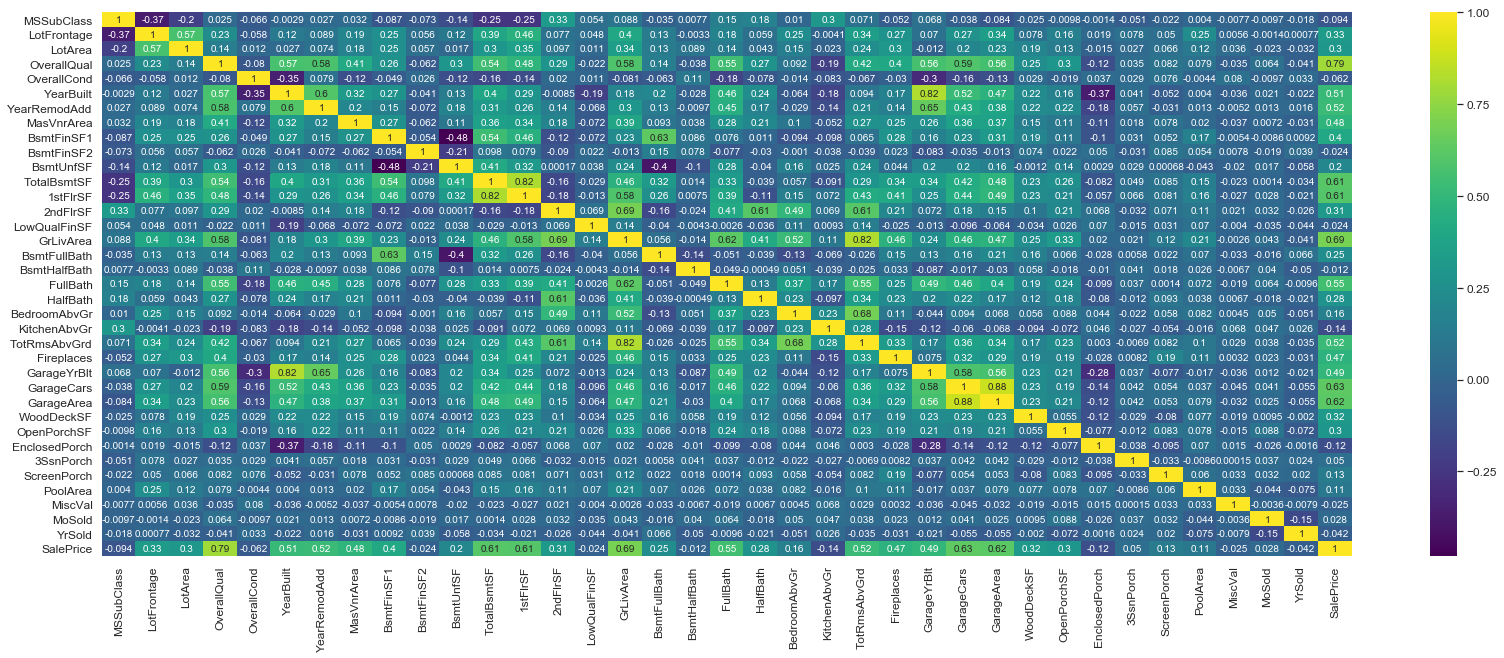

In [130]:
plt.figure(figsize= (28,10))
sns.heatmap(housingData.corr(), cmap = 'viridis', annot= True)